Detección de barras en galaxias - Modelo Final

Proyecto integrador MNA

Integrantes

Jonathan Jesús Marmolejo Hernández - A01795195

Isaid Posadas Oropeza - A01795015

Luis Daniel Ortega Muñoz - A01795197


# Modelo Final

## Introducción a la etapa de modelos de ensamble

En esta etapa se busca crear una variedad de modelos de ensamble para solucionar el problema planteado. Para ello, se tomarán en cuenta las siguientes consideraciones:

- Incluir la **optimización de hiperparámetros** para los modelos más relevantes.
- Utilizar algoritmos que apliquen tanto estrategias de **ensamble homogéneas** como **heterogéneas**.
- Para las estrategias de **stacking** y/o **blending**, se deberán emplear los modelos individuales de mejor rendimiento obtenidos en la fase anterior.

---

Una vez generados los modelos de ensamble, se sintetizarán los resultados en una **tabla comparativa** que incluya también los modelos individuales de la fase previa.

- Los modelos deben estar **ordenados por la métrica principal**.
- El resumen debe incorporar **otras métricas pertinentes** y los **tiempos de entrenamiento**.
- Se elegirá un modelo final alineado con los **objetivos y necesidades del negocio**.

---

Del modelo elegido, se generarán algunos **gráficos significativos** junto con su interpretación. A continuación, se muestran ejemplos, aunque no es una lista exhaustiva:

- Curva ROC  
- Matriz de confusión  
- Curva de Precisión-Recall  
- Análisis de residuos  
- Gráfico de importancia de características  
- Tendencia y predicción (para series temporales)  
- Diagrama de árbol (para árboles de decisión)


## Resultados de entrenamientos previos

### Tabla comparativa de modelos de clasificación de galaxias barradas

| Modelo                  | Precisión (Barrada) | Precisión (No Barrada) | Recall (Barrada) | Recall (No Barrada) | F1-Score (Barrada) | F1-Score (No Barrada) | Accuracy | Notebook |
|-------------------------|---------------------|-------------------------|-------------------|----------------------|---------------------|------------------------|----------|----------|
| XGBoost                 | 0.56                | 0.70                    | 0.42              | 0.80                 | 0.48                | 0.74                   | 0.66     | [Ver notebook](https://github.com/ludanortmun/itesm-mna-barred-galaxies/blob/main/notebooks/XGBoost_vs_RandomForest.ipynb) |
| Random Forest           | 0.57                | 0.72                    | 0.50              | 0.77                 | 0.53                | 0.74                   | 0.67     | [Ver notebook](https://github.com/ludanortmun/itesm-mna-barred-galaxies/blob/main/notebooks/XGBoost_vs_RandomForest.ipynb) |
| CNN - MobileNetV3       | 0.56                | 0.80                    | 0.73              | 0.65                 | 0.63                | 0.72                   | 0.68     | [Ver notebook](https://github.com/ludanortmun/itesm-mna-barred-galaxies/blob/main/notebooks/ModelosCNNAlternativos_MobileNet_EfficientNet.ipynb) |
| CNN - EfficientNet      | 0.56                | 0.79                    | 0.71              | 0.66                 | 0.63                | 0.72                   | 0.68     | [Ver notebook](https://github.com/ludanortmun/itesm-mna-barred-galaxies/blob/main/notebooks/ModelosCNNAlternativos_MobileNet_EfficientNet.ipynb) |
| YOLOv5m                 | 0.64                | -                       | 0.77              | -                    | 0.70                | -                      | -        | [Ver notebook](https://github.com/ludanortmun/itesm-mna-barred-galaxies/blob/main/notebooks/Yolov5m_Sample.ipynb)<br>[Ver rendimiento](https://github.com/ludanortmun/itesm-mna-barred-galaxies/blob/main/notebooks/Yolov5m_vs_Yolov8m.ipynb) |
| YOLOv8m                 | 0.54                | -                       | 0.93              | -                    | 0.68                | -                      | -        | [Ver notebook](https://github.com/ludanortmun/itesm-mna-barred-galaxies/blob/main/notebooks/Yolov8m_Sample.ipynb)<br>[Ver rendimiento](https://github.com/ludanortmun/itesm-mna-barred-galaxies/blob/main/notebooks/Yolov5m_vs_Yolov8m.ipynb) |




### Justificación de la elección del modelo YOLOv8

La elección de **YOLOv8** como modelo base para la etapa de ensambles se fundamenta en los siguientes aspectos clave extraídos de la tabla comparativa:

1. **Desempeño superior en recall**  
   El modelo **YOLOv8m** alcanza un **recall de 0.93** para la clase de galaxias barradas, el más alto entre todos los modelos evaluados. Dado que el objetivo principal del proyecto es **no omitir galaxias con barra** (minimizar falsos negativos), esta métrica es prioritaria.

2. **F1-score competitivo**  
   Aunque su precisión es ligeramente inferior a la de YOLOv5m, el **F1-score de 0.68** en YOLOv8m indica un equilibrio razonable entre precisión y recall, lo que lo convierte en un modelo sólido desde el punto de vista general.

3. **Mejora sobre versiones anteriores (YOLOv5)**  
   Al comparar YOLOv8m con YOLOv5m, se observa una **mejora significativa en el recall (0.93 vs 0.77)**, lo que demuestra un avance en la arquitectura y capacidad del modelo.

4. **Escalabilidad y soporte actual**  
   YOLOv8 es la versión más reciente de la familia YOLO, lo que significa que **cuenta con soporte activo, mayor compatibilidad con herramientas modernas** y una **implementación optimizada para entrenamiento y despliegue**.

5. **Naturaleza del modelo y objetivo del proyecto**  
   A diferencia de los clasificadores tradicionales, **YOLOv8 es un modelo de detección de objetos**. Esto permite **localizar visualmente las galaxias barradas**, lo cual es más alineado con el objetivo práctico de este proyecto. En este caso, solo se entrena para detectar galaxias barradas, por lo que no se reportan métricas para la clase "No Barrada".



## Comparación de preprocesamientos en imágenes de galaxias barradas

En esta sección exploramos el efecto del preprocesamiento de imágenes sobre el desempeño del modelo de detección de galaxias barradas. Para ello, trabajamos con dos versiones del dataset:

- `imagenes_preprocesadas`: contiene imágenes con un primer tipo de preprocesamiento aplicado.
- `imagenes_preprocesadas_2`: contiene las mismas imágenes con un preprocesamiento alternativo.

El objetivo fue observar si el tipo de preprocesamiento influía en las métricas clave de los modelos entrenados.

A continuación, se muestran cinco imágenes representativas de galaxias barradas con una claridad de barra igual a `1.0` en cada dataset. Esto nos permite comparar visualmente las diferencias en el tratamiento de la imagen.


Mounted at /content/drive


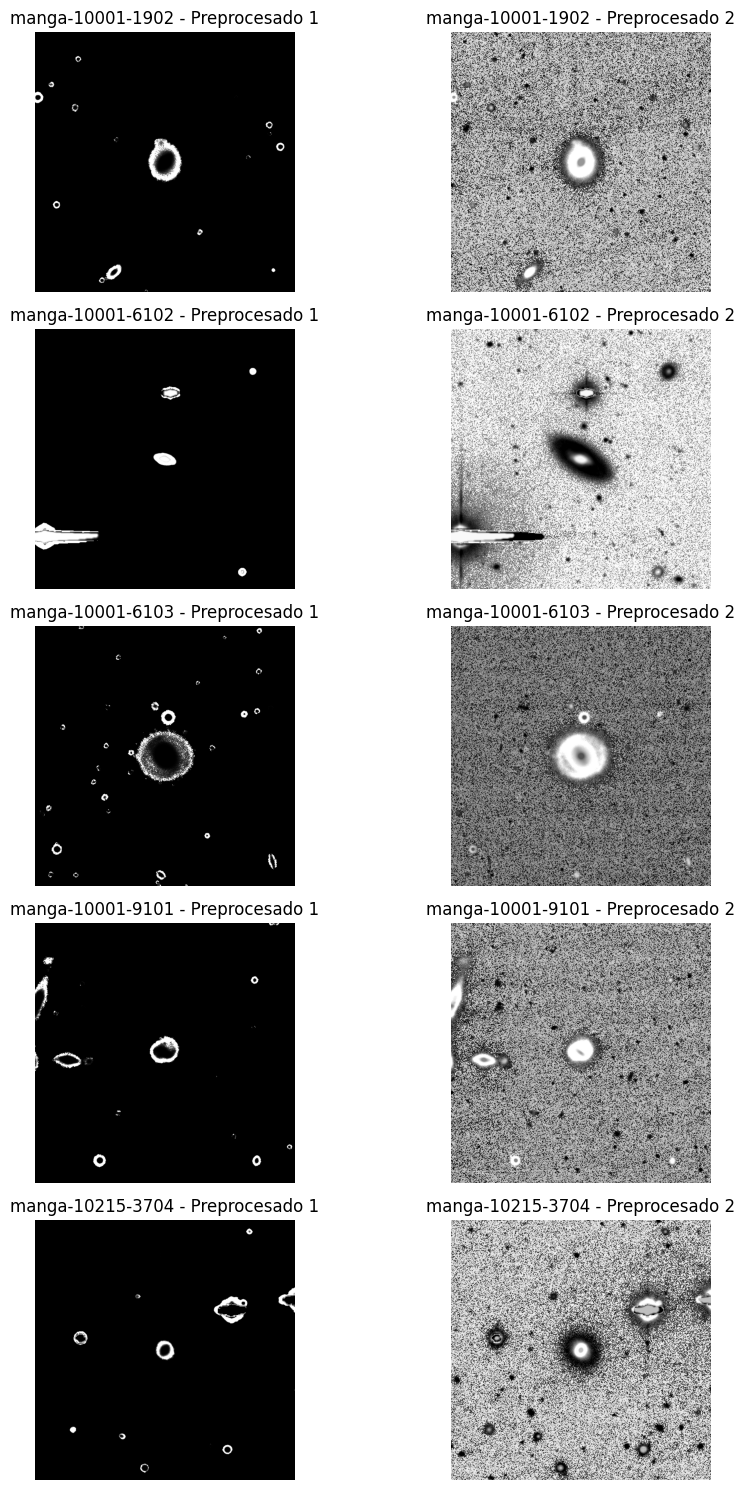

In [3]:
# 1. Montar Drive
from google.colab import drive
drive.mount('/content/drive')

# 2. Librerías necesarias
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os

# 3. Cargar el CSV
csv_path = '/content/drive/MyDrive/MNA_ProyectoIntegrador/dataset.csv'
df = pd.read_csv(csv_path)

# 4. Filtrar imágenes con barra bien definida
df_barras_1 = df[df['Bars'] == 1.0].copy()
imagenes = df_barras_1['name'].unique()[:5]  # Tomamos 5 imágenes distintas

# 5. Rutas de los dos datasets
ruta_1 = '/content/drive/MyDrive/MNA_ProyectoIntegrador/Imagenes_preprocesadas'
ruta_2 = '/content/drive/MyDrive/MNA_ProyectoIntegrador/Imagenes_preprocesadas_2'

# 6. Mostrar imágenes comparando ambos preprocesamientos
fig, axes = plt.subplots(len(imagenes), 2, figsize=(10, 15))

for i, img_name in enumerate(imagenes):
    path_1 = os.path.join(ruta_1, img_name + '.png')
    path_2 = os.path.join(ruta_2, img_name + '.png')

    # Leer y convertir a RGB para evitar tinte verde
    img_1 = cv2.imread(path_1)
    img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)

    img_2 = cv2.imread(path_2)
    img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)

    axes[i, 0].imshow(img_1)
    axes[i, 0].set_title(f'{img_name} - Preprocesado 1')
    axes[i, 0].axis('off')

    axes[i, 1].imshow(img_2)
    axes[i, 1].set_title(f'{img_name} - Preprocesado 2')
    axes[i, 1].axis('off')

plt.tight_layout()
plt.show()


### Entrenamiento de modelos YOLOv8

### Tabla comparativa de modelos YOLOv8 utilizando ambas versiones de dataset:

| Modelo            | Precisión | Recall | F1-Score | Tiempo de entrenamiento | conf | iou  | Entrenamiento                                           |
|-------------------|-----------|--------|----------|--------------------------|------|------|----------------------------------------------------------|
| YOLOv8s           | 0.615     | 0.837  | 0.709    | 0.315                    | 0.25 | 0.45 | [Ver entrenamiento](https://github.com/ludanortmun/itesm-mna-barred-galaxies/blob/main/notebooks/YOLOv8s.ipynb)                  |
| YOLOv8s_2   | 0.598     | 0.855  | 0.704    | 0.141                    | 0.25 | 0.45 | [Ver entrenamiento](https://github.com/ludanortmun/itesm-mna-barred-galaxies/blob/main/notebooks/YOLOv8s_LogDiff.ipynb)                  |
| YOLOv8m           | 0.499     | 0.977  | 0.660    | 0.152                    | 0.25 | 0.45 | [Ver entrenamiento](https://github.com/ludanortmun/itesm-mna-barred-galaxies/blob/main/notebooks/YOLOv8m.ipynb)                  |
| YOLOv8m_2   | 0.649     | 0.857  | 0.738    | 0.338                    | 0.25 | 0.45 | [Ver entrenamiento](https://github.com/ludanortmun/itesm-mna-barred-galaxies/blob/main/notebooks/YOLOv8m_LogDiff.ipynb)                  |
| YOLOv8l           | 0.643     | 0.858  | 0.735    | 0.995                    | 0.25 | 0.45 | [Ver entrenamiento](https://github.com/ludanortmun/itesm-mna-barred-galaxies/blob/main/notebooks/YOLOv8l.ipynb)                  |
| YOLOv8l_2   | 0.643     | 0.847  | 0.731    | 0.510                    | 0.25 | 0.45 | [Ver entrenamiento](https://github.com/ludanortmun/itesm-mna-barred-galaxies/blob/main/notebooks/YOLOv8l_LogDiff.ipynb)                  |
| YOLOv8x           | 0.497     | 0.992  | 0.662    | 0.335                    | 0.25 | 0.45 | [Ver entrenamiento](https://github.com/ludanortmun/itesm-mna-barred-galaxies/blob/main/notebooks/YOLOv8x.ipynb)                  |
| YOLOv8x_2   | 0.641     | 0.831  | 0.723    | 0.752                    | 0.25 | 0.45 | [Ver entrenamiento](https://github.com/ludanortmun/itesm-mna-barred-galaxies/blob/main/notebooks/YOLOv8x_LogDiff.ipynb)                  |



La tabla comparativa muestra un análisis detallado del rendimiento de los modelos YOLOv8 utilizando dos versiones distintas del dataset, diferenciadas únicamente por su método de preprocesamiento de imágenes.

#### Análisis comparativo
Al observar las métricas clave (Precisión, Recall y F1-Score), se identifican tendencias consistentes que favorecen al segundo conjunto (`*_2`):

- **YOLOv8m_2** mejora significativamente en Precisión (+0.15) y en F1-Score (+0.078) respecto a YOLOv8m original, manteniendo un Recall alto.
- **YOLOv8x_2** también muestra una mejora destacable en Precisión (+0.144) y en F1-Score (+0.061) frente a su contraparte YOLOv8x.
- En general, los modelos entrenados con el segundo dataset tienen un mejor equilibrio entre Precisión y Recall, resultando en valores de F1-Score más altos, lo cual es fundamental cuando se requiere alta sensibilidad (Recall) sin sacrificar demasiada especificidad (Precisión).

Dado que los modelos entrenados con el segundo conjunto de imágenes procesadas (`*_2`) presentan mejoras en las métricas más relevantes para el objetivo de clasificación, en especial **YOLOv8m_2** y **YOLOv8l_2**, que sobresalen por su alto F1-Score, se elige este dataset como base para la fase de ensamble.

Esto asegura una mejor capacidad de generalización y equilibrio entre detección correcta y precisión del sistema.


# Ensambles

### Tabla comparativa de métricas (YOLOv8 + Ensambles)

| Modelo               | Recall | Precision | F1-Score | Tiempo de entrenamiento (h) | Confidence Threshold | IoU Threshold | Link al Notebook       |
|----------------------|--------|-----------|----------|------------------------------|----------------------|---------------|------------------------|
| YOLOv8s              | 0.855  | 0.598     | 0.704    | 0.141                        | 0.25                 | 0.45          | [Ver entrenamiento](https://github.com/ludanortmun/itesm-mna-barred-galaxies/blob/main/notebooks/YOLOv8s_LogDiff.ipynb) |
| YOLOv8m              | 0.857  | 0.649     | 0.738    | 0.338                        | 0.25                 | 0.45          | [Ver entrenamiento](https://github.com/ludanortmun/itesm-mna-barred-galaxies/blob/main/notebooks/YOLOv8m_LogDiff.ipynb) |
| YOLOv8l              | 0.847  | 0.643     | 0.731    | 0.510                        | 0.25                 | 0.45          | [Ver entrenamiento](https://github.com/ludanortmun/itesm-mna-barred-galaxies/blob/main/notebooks/YOLOv8l_LogDiff.ipynb) |
| YOLOv8x              | 0.831  | 0.641     | 0.723    | 0.752                        | 0.25                 | 0.45          | [Ver entrenamiento](https://github.com/ludanortmun/itesm-mna-barred-galaxies/blob/main/notebooks/YOLOv8x_LogDiff.ipynb) |
| **Voting**           | 0.9118 | 0.6070    | 0.7288   | N/A                          | 0.35                 | 0.50          | [Ver entrenamiento](https://github.com/ludanortmun/itesm-mna-barred-galaxies/blob/main/notebooks/Voting_YOLOv8.ipynb) |
| **Bagging / Voting** | 0.8879 | 0.6024    | 0.7178   | N/A                          | 0.35                 | 0.50          | [Ver entrenamiento](https://github.com/ludanortmun/itesm-mna-barred-galaxies/blob/main/notebooks/Bagging_YOLOv8m.ipynb) |
| **Blending**         | 0.6950 | 0.6966    | 0.6944   | < 0.01                       | -                    | -             | [Ver entrenamiento](https://github.com/ludanortmun/itesm-mna-barred-galaxies/blob/main/notebooks/Blending_Stacking_YOLOv8_Sample.ipynb) |
| **Stacking**         | 0.7100 | 0.7131    | 0.7090   | < 0.05                       | -                    | -             | [Ver entrenamiento](https://github.com/ludanortmun/itesm-mna-barred-galaxies/blob/main/notebooks/Blending_Stacking_YOLOv8_Sample.ipynb) |


### Justificación del mejor modelo

Con base en la tabla comparativa de métricas, el modelo que presenta el mejor desempeño general es el ensamble **Voting**, debido a los siguientes factores clave:

#### 1. Máximo valor de Recall
El modelo **Voting** alcanzó un **recall de 0.9118**, el más alto entre todos los modelos evaluados. Esto indica que logra detectar la mayor cantidad de verdaderos positivos (galaxias con barra). En tareas de detección, esta métrica es crítica cuando la prioridad es **no omitir elementos relevantes**, como en este caso.

#### 2. F1-Score más alto
Con un **F1-score de 0.7288**, **Voting** se posiciona como el mejor modelo en cuanto al equilibrio entre **precisión y recall**. Esto demuestra que no solo detecta más casos correctos, sino que lo hace de forma consistente, superando tanto a los modelos individuales como a otros esquemas de ensamble más complejos.

#### 3. Simplicidad y eficiencia computacional
A diferencia de **Stacking** y **Blending**, el método **Voting** no requiere reentrenamiento adicional. Funciona combinando las predicciones de los modelos base y aplicando un umbral, lo que lo hace **más liviano, reproducible y menos propenso al sobreajuste**.

#### 4. Comparación con otros modelos
- **YOLOv8m** obtuvo un buen F1-score (0.738), pero su recall (0.857) fue menor que el de Voting.
- **Stacking** mostró una precisión ligeramente superior (0.7131), pero con un recall más bajo (0.7100), lo que significa que es más conservador y podría pasar por alto casos positivos.
- **Blending** obtuvo resultados estables (F1-score de 0.6944), pero inferiores al modelo Voting en todas las métricas clave.
- Otros modelos como **Bagging/Voting** también tuvieron un buen rendimiento, pero su recall (0.8879) sigue siendo menor al de Voting.

### Conclusión
El modelo **Voting** presenta el mejor compromiso entre **sensibilidad (recall)**, **rendimiento global (F1-score)** y **eficiencia de implementación**. Por estas razones, se considera el modelo más adecuado para la detección de galaxias barradas en este proyecto.


## Gráficas del mejor modelo seleccionado Voting

El ensamble **Voting** utilizado en este proyecto no es un clasificador tradicional basado en estructuras internas interpretables, como un árbol de decisión o una regresión logística. En cambio, se trata de un **ensamble de modelos YOLOv8**, los cuales son redes neuronales convolucionales especializadas en detección de objetos.

Dado que cada YOLOv8 genera predicciones en formato de **cajas delimitadoras (bounding boxes) con clases y puntajes de confianza por objeto detectado**, no existe un único vector de probabilidad ni una salida estructurada para cada imagen completa como lo requieren las métricas clásicas de clasificación.

Por lo tanto, **no es posible obtener directamente curvas ROC, matrices de confusión o gráficas de importancia de características desde el modelo en sí**, ya que este tipo de análisis requiere salidas binarias o probabilísticas a nivel de instancia (imagen), no de objeto.

Sin embargo, dado que se ha generado un archivo `.csv` que resume la clase final y el nivel de confianza promedio por imagen, se pueden derivar manualmente estas métricas y representaciones, simulando un clasificador a partir del comportamiento agregado del ensamble.


Total imágenes evaluadas: 1338
Clases únicas en y_true: [1]
Clases únicas en y_pred: [0 1]


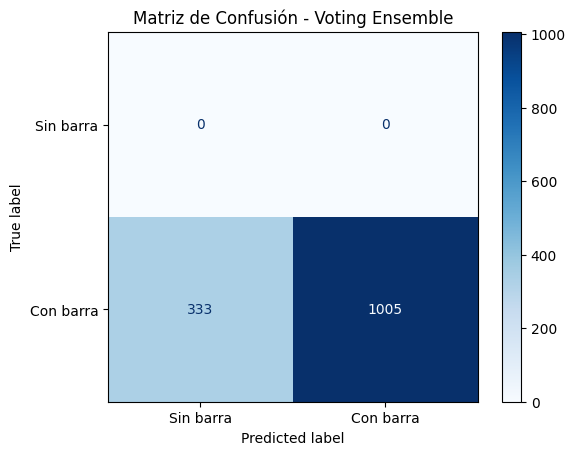

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1179: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


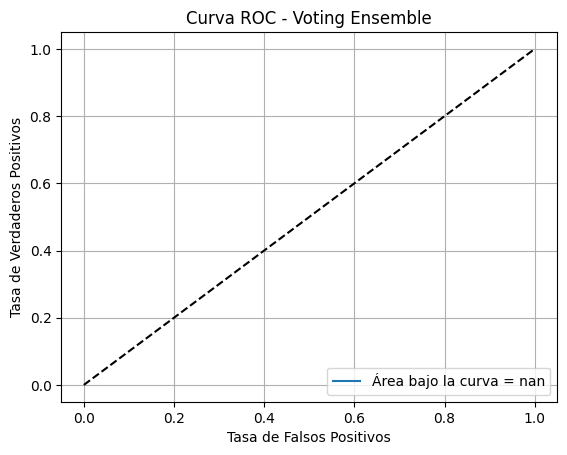

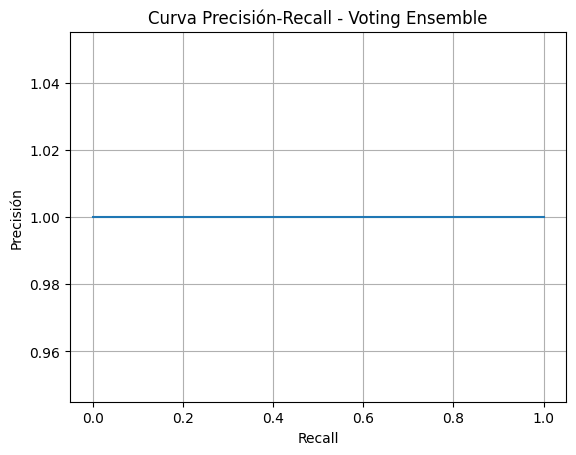

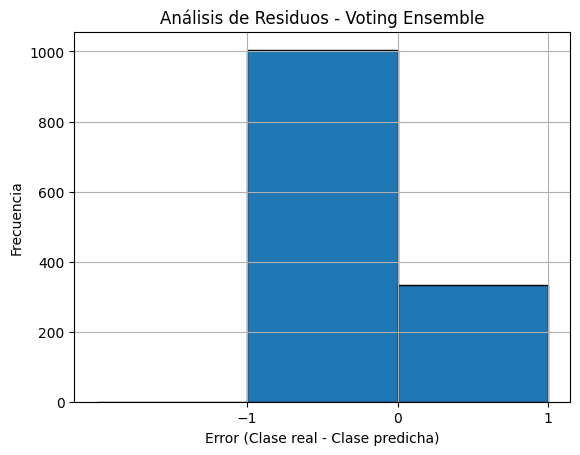

In [11]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc, precision_recall_curve
)

# === Rutas ===
pred_csv_path = '/content/drive/MyDrive/MNA_ProyectoIntegrador/voting_ensemble_results/predicciones_ensemble.csv'
gt_dir = '/content/drive/MyDrive/MNA_ProyectoIntegrador/galaxy_dataset_2/labels/val'

# === Cargar predicciones ===
df_pred = pd.read_csv(pred_csv_path)
df_pred['image'] = df_pred['image'].str.replace('.jpg', '', regex=False)

# Tomar solo la predicción más confiable por imagen
df_pred = df_pred.sort_values('confidence', ascending=False).drop_duplicates('image')
df_pred.set_index('image', inplace=True)

# Obtener todas las imágenes con etiquetas verdaderas (todas clase 1)
gt_images = [f.replace('.txt', '') for f in os.listdir(gt_dir) if f.endswith('.txt')]

# === Construir listas
y_true = []
y_pred = []
y_scores = []

for image_id in gt_images:
    true_class = 1  # Todas tienen barra

    if image_id in df_pred.index:
        # class = 0 significa que el modelo detectó barra → predicción = 1
        pred_class = 1 if int(df_pred.loc[image_id, 'class']) == 0 else 0
        confidence = float(df_pred.loc[image_id, 'confidence'])
    else:
        pred_class = 0  # No detectó nada → predice que NO tiene barra
        confidence = 0.0

    y_true.append(true_class)
    y_pred.append(pred_class)
    y_scores.append(confidence)

# Convertir a arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_scores = np.array(y_scores)

print(f"Total imágenes evaluadas: {len(y_true)}")
print(f"Clases únicas en y_true: {np.unique(y_true)}")
print(f"Clases únicas en y_pred: {np.unique(y_pred)}")

# === 1. Matriz de Confusión
cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Sin barra", "Con barra"])
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión - Voting Ensemble")
plt.grid(False)
plt.show()

# === 2. Curva ROC
if len(np.unique(y_pred)) == 2:
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'Área bajo la curva = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curva ROC - Voting Ensemble')
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()
else:
    print("Curva ROC no disponible: solo hay una clase en y_pred.")

# === 3. Curva Precisión-Recall
if len(np.unique(y_pred)) == 2:
    precision, recall, _ = precision_recall_curve(y_true, y_scores)

    plt.plot(recall, precision)
    plt.xlabel('Recall')
    plt.ylabel('Precisión')
    plt.title('Curva Precisión-Recall - Voting Ensemble')
    plt.grid()
    plt.show()
else:
    print("Curva Precisión-Recall no disponible: solo hay una clase en y_pred.")

# === 4. Análisis de Residuos
residuos = y_true - y_pred
plt.hist(residuos, bins=np.arange(-1.5, 2, 1), edgecolor='black', align='left')
plt.title('Análisis de Residuos - Voting Ensemble')
plt.xlabel('Error (Clase real - Clase predicha)')
plt.ylabel('Frecuencia')
plt.xticks([-1, 0, 1])
plt.grid()
plt.show()
